# Diffusion of Behaviour and feedback effect v.2  

## Jensen 2015: Agent-based assessment framework for behavior-changing feedback devices: Spreading of devices and heating behavior



## 1. Enačba za behaviour diffusion

Difuzija obnašanja je opisana z naslednjo enačbo:
<img src="https://paper-attachments.dropbox.com/s_A831B714AFE1BEFFE0B96A138A7F786D45DBC26AD537D3FEF7D5EDBD3688FD3C_1592428047496_image.png" width="400">

- βit = energy consumption behaviour  of induvidial at certain time
- βit - 1 = previous energy consumption
- Si = susceptibility of induvidial
- wij = strenghth of social tie
- βjt = Energy  consumtion behaviour of peer 

Obnašanje posameznika v nekem trenutku = Njegovo prejšnje obnašanje + nivo dovzetnosti * ( Vsota obteženih obnašanj v vseh peerov \ Vsota vseh uteži (moč družbenih povezav) - Prejšnje obnašanje posameznika


In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import itertools
import random
import copy
import pandas as pd
import networkx as nx

## 3. Implementacija modela
Implementacija modela poteka v naslednjih fazah:
 1. Branje podatkov iz zunanje Excell datoteke in zapis v Pandas data frames
 2. Create agents
 3. Create connections
 4. Calculate  behaviour
 5. Communicate peers

 
### 3.1 Branje in zapis podatkov



In [2]:
agentData = pd.read_csv('Data/IM_S4_EES_Slo.csv', encoding= 'unicode_escape')
#agentData = agentData.set_index('USERID')
agentData10 = agentData.head(10)

In [3]:
agentData10.head(10)

,USERID,"ID: Newspaper reading, total time on average weekday","Newspaper reading, total time on average weekday",ID: Personal use of internet/e-mail/www,Personal use of internet/e-mail/www,"ID: How often socially meet with friends, relatives or colleagues","How often socially meet with friends, relatives or colleagues",ID: Gender,Gender,"Age of respondent, calculated",...,ID: Important to get respect from others,Important to get respect from others,ID: Important to care for nature and environment,Important to care for nature and environment,ID: Important to follow traditions and customs,Important to follow traditions and customs,ID: Hard to be hopeful about the future of the world,Hard to be hopeful about the future of the world,ID: Feel close to the people in local area,Feel close to the people in local area
0,1-1,3.0,"More than 1 hour, up to 1,5 hours",1.0,Never use,2,Less than once a month,1,Male,71.0,...,2.0,Like me,2.0,Like me,2.0,Like me,NaN,NaN,NaN,NaN
1,1-2,1.0,"Less than 0,5 hour",6.0,Several times a week,6,Several times a week,2,Female,29.0,...,3.0,Somewhat like me,2.0,Like me,3.0,Somewhat like me,NaN,NaN,NaN,NaN
2,1-3,4.0,"More than 1,5 hours, up to 2 hours",0.0,No access at home or work,4,Several times a month,2,Female,82.0,...,1.0,Very much like me,1.0,Very much like me,1.0,Very much like me,NaN,NaN,NaN,NaN
3,1-4,3.0,"More than 1 hour, up to 1,5 hours",0.0,No access at home or work,2,Less than once a month,2,Female,57.0,...,1.0,Very much like me,1.0,Very much like me,1.0,Very much like me,NaN,NaN,NaN,NaN
4,1-5,3.0,"More than 1 hour, up to 1,5 hours",1.0,Never use,5,Once a week,2,Female,65.0,...,2.0,Like me,1.0,Very much like me,1.0,Very much like me,NaN,NaN,NaN,NaN
5,1-6,1.0,"Less than 0,5 hour",6.0,Several times a week,6,Several times a week,1,Male,40.0,...,2.0,Like me,1.0,Very much like me,2.0,Like me,NaN,NaN,NaN,NaN
6,1-7,2.0,"0,5 hour to 1 hour",1.0,Never use,6,Several times a week,2,Female,65.0,...,2.0,Like me,1.0,Very much like me,1.0,Very much like me,NaN,NaN,NaN,NaN
7,1-8,2.0,"0,5 hour to 1 hour",6.0,Several times a week,1,Never,1,Male,42.0,...,1.0,Very much like me,1.0,Very much like me,3.0,Somewhat like me,NaN,NaN,NaN,NaN
8,1-9,1.0,"Less than 0,5 hour",1.0,Never use,2,Less than once a month,2,Female,37.0,...,3.0,Somewhat like me,1.0,Very much like me,2.0,Like me,NaN,NaN,NaN,NaN
9,1-10,1.0,"Less than 0,5 hour",1.0,Never use,5,Once a week,2,Female,33.0,...,1.0,Very much like me,1.0,Very much like me,6.0,Not like me at all,NaN,NaN,NaN,NaN


In [4]:
network = nx.Graph()

def createAgents(data, networkName):
    #go trough data and create agents with possible atributes
    for index, row in data.iterrows():
        #adds node for each agent
        networkName.add_node(index)
        #set behaviour value 
        if row['ID: Personal use of internet/e-mail/www'] > 4.:
            networkName.nodes[index]['Behaviour'] = 18.
        else:
            networkName.nodes[index]['Behaviour'] = 21.
        #calculate susceptibilty
        social = row['ID: How often socially meet with friends, relatives or colleagues']
        networkName.nodes[index]['susceptibility'] = social / 8
        networkName.nodes[index]['w'] = 0.2
    pos = nx.circular_layout(networkName)
    plt.figure(figsize = (9, 6)) 
    nx.draw_networkx(networkName,pos)  
    return network

In [5]:
len(agentData10)

10

NodeDataView({0: {'Behaviour': 21.0, 'susceptibility': 0.25, 'w': 0.2}, 1: {'Behaviour': 18.0, 'susceptibility': 0.75, 'w': 0.2}, 2: {'Behaviour': 21.0, 'susceptibility': 0.5, 'w': 0.2}, 3: {'Behaviour': 21.0, 'susceptibility': 0.25, 'w': 0.2}, 4: {'Behaviour': 21.0, 'susceptibility': 0.625, 'w': 0.2}, 5: {'Behaviour': 18.0, 'susceptibility': 0.75, 'w': 0.2}, 6: {'Behaviour': 21.0, 'susceptibility': 0.75, 'w': 0.2}, 7: {'Behaviour': 18.0, 'susceptibility': 0.125, 'w': 0.2}, 8: {'Behaviour': 21.0, 'susceptibility': 0.25, 'w': 0.2}, 9: {'Behaviour': 21.0, 'susceptibility': 0.625, 'w': 0.2}})

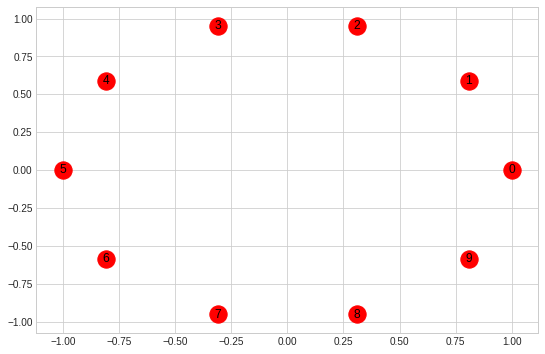

In [6]:
createAgents(agentData10, network)
network.nodes.data()

In [7]:
def createConnections(networkName):
    for node in networkName.__iter__():
        nodesList = list(networkName.__iter__())
        networkName.add_edge(node, nodesList[random.randint(0,len(nodesList)-1)])
        networkName.nodes[node]['Neighbours'] = list(networkName.neighbors(node))
    pos = nx.circular_layout(networkName)
    plt.figure(figsize = (9, 6))
    nx.draw_networkx(network)  
    return networkName

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


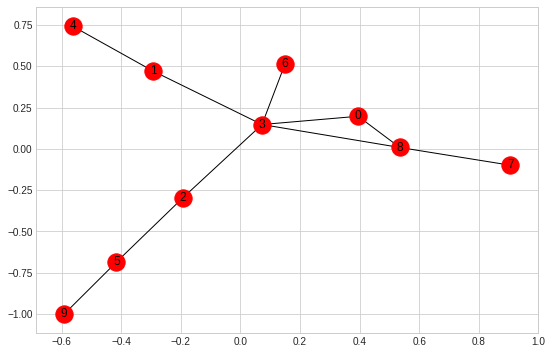

In [8]:
createConnections(network)

In [9]:
network.nodes.data()

NodeDataView({0: {'Behaviour': 21.0, 'susceptibility': 0.25, 'w': 0.2, 'Neighbours': [3]}, 1: {'Behaviour': 18.0, 'susceptibility': 0.75, 'w': 0.2, 'Neighbours': [3]}, 2: {'Behaviour': 21.0, 'susceptibility': 0.5, 'w': 0.2, 'Neighbours': [3]}, 3: {'Behaviour': 21.0, 'susceptibility': 0.25, 'w': 0.2, 'Neighbours': [0, 1, 2, 8]}, 4: {'Behaviour': 21.0, 'susceptibility': 0.625, 'w': 0.2, 'Neighbours': [1]}, 5: {'Behaviour': 18.0, 'susceptibility': 0.75, 'w': 0.2, 'Neighbours': [2]}, 6: {'Behaviour': 21.0, 'susceptibility': 0.75, 'w': 0.2, 'Neighbours': [3]}, 7: {'Behaviour': 18.0, 'susceptibility': 0.125, 'w': 0.2, 'Neighbours': [8]}, 8: {'Behaviour': 21.0, 'susceptibility': 0.25, 'w': 0.2, 'Neighbours': [3, 7, 0]}, 9: {'Behaviour': 21.0, 'susceptibility': 0.625, 'w': 0.2, 'Neighbours': [5]}})

In [13]:
def calculateBehaviour(agent, network):
    # naredi seznam agentovih sosedov 
    neighboursList = network.nodes[agent]['Neighbours']
    behList = []
    wList = []
    
    #print("Zacetni", network.nodes[agent]['behaviour'])
    
    # pridobi behavior in w vsakega soseda in ga shrani v seznam
    for n in neighboursList:
        behList.append(network.nodes[n]['Behaviour'])
        wList.append(network.nodes[n]['w'])
    #print(behList)

    # izracunaj behaviour po enacbi
    agentBehaviour = network.nodes[agent]['Behaviour'] + network.nodes[agent]['susceptibility'] * (
                sum(behList[n] * wList[n] for n in range(len(behList))) / sum(wList) - network.nodes[agent][
            'Behaviour'])

    print("Izracunan", agentBehaviour)

    # updejtaj agentov behaviour v omrežju
    network.nodes[agent]['Behaviour'] = agentBehaviour

    return network.nodes[agent]['Behaviour']

In [18]:
def communicatePeers(network,timesteps):
    t = 0
    exportData = {}
    while t < timesteps:
        for agents in network:
            print("Agent:", agents, "Beh", calculateBehaviour(agents,network))
            exportBeh = calculateBehaviour(agents,network)
            exportData[agents] = exportBeh
        t += 1
        
    return exportData

In [19]:
communicatePeers(network,10)

Izracunan 20.811724985987816
Agent: 0 Beh 20.811724985987816
Izracunan 20.80412843666144
Izracunan 20.786934718997877
Agent: 1 Beh 20.786934718997877
Izracunan 20.782737771261203
Izracunan 20.79891629136858
Agent: 2 Beh 20.79891629136858
Izracunan 20.790127540025445
Izracunan 20.763713346689592
Agent: 3 Beh 20.763713346689592
Izracunan 20.75049426519505
Izracunan 20.794780920015153
Agent: 4 Beh 20.794780920015153
Izracunan 20.787253952043933
Izracunan 20.798314441162976
Agent: 5 Beh 20.798314441162976
Izracunan 20.79217426530983
Izracunan 20.759604557459692
Agent: 6 Beh 20.759604557459692
Izracunan 20.75277183826121
Izracunan 19.93327199561372
Agent: 7 Beh 19.93327199561372
Izracunan 19.99990728802421
Izracunan 20.47930991699663
Agent: 8 Beh 20.47930991699663
Izracunan 20.489026603570863
Izracunan 20.80801234225365
Agent: 9 Beh 20.80801234225365
Izracunan 20.798113544163762
Izracunan 20.790719893794844
Agent: 0 Beh 20.790719893794844
Izracunan 20.780663486644897
Izracunan 20.7585551417

Izracunan 20.600391942259705
Agent: 8 Beh 20.600391942259705
Izracunan 20.602586960280277
Izracunan 20.654717313835604
Agent: 9 Beh 20.654717313835604
Izracunan 20.65303860054927


{0: 20.659324718758697,
 1: 20.650056002883204,
 2: 20.651636298638614,
 3: 20.64528508659771,
 4: 20.65098683990439,
 5: 20.65203137257747,
 6: 20.645583268865554,
 7: 20.522906237669563,
 8: 20.602586960280277,
 9: 20.65303860054927}